Q1. implement KNN classification on the Iris dataset and report the accuracy

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f" Accuracy of KNN : {accuracy:.2f}")

 Accuracy of KNN : 1.00


Q2. Use logistic regression on a synthetic dataset and calculate the AUC.?

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

X, y = make_classification(n_samples=1000, n_features=20,
                           n_informative=2, n_redundant=10,
                           n_clusters_per_class=1, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)

y_probs = model.predict_proba(X_test)[:, 1]

auc = roc_auc_score(y_test, y_probs)
print(f"AUC:{auc:.2f}")

AUC:0.95


Q3.Train a decision tree on the Iris dataset and show the feature importance

             Feature  Importance
2  petal length (cm)    0.564056
3   petal width (cm)    0.422611
0  sepal length (cm)    0.013333
1   sepal width (cm)    0.000000


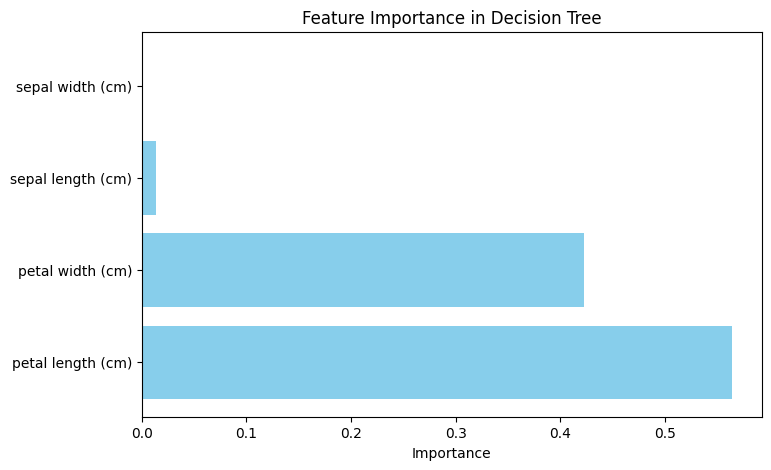

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)

imp = clf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': imp
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

plt.figure(figsize=(8, 5))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance in Decision Tree')
plt.show()

Q4.Prefer linear regression on a synthetic dataset and calculate the MSE


Mean Squared Error: 312.21700168495596


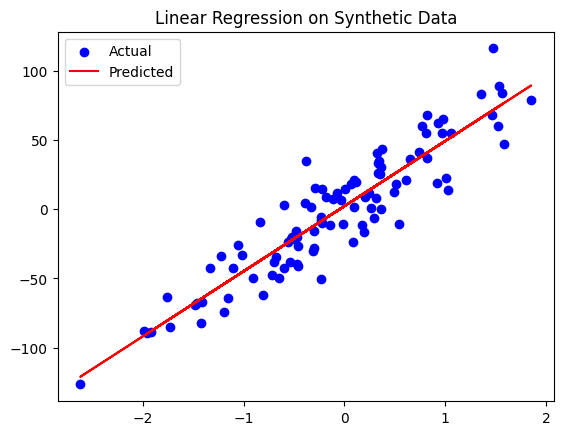

In [ ]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

X, y = make_regression(n_samples=100, n_features=1, noise=20, random_state=42)

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

mse = mean_squared_error(y, y_pred)
print("Mean Squared Error:", mse)

plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_pred, color='red', label='Predicted')
plt.title('Linear Regression on Synthetic Data')
plt.legend()
plt.show()

Q5.Apply K-Means clustering on the blobs dataset and display the cluster centers

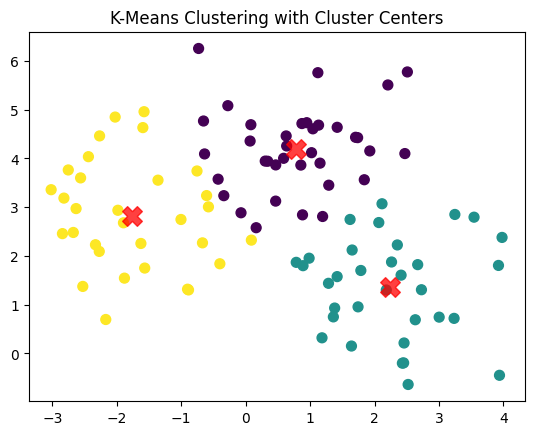

Cluster Centers:
 [[ 0.7760184   4.19887347]
 [ 2.2388868   1.35992734]
 [-1.75891146  2.82637936]]


In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X, y = make_blobs(
    n_samples=100,
    n_features=2,
    centers=None,
    cluster_std=1.0,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=0,
    return_centers=False
)

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)
centers = kmeans.cluster_centers_
labels = kmeans.labels_

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('K-Means Clustering with Cluster Centers')
plt.show()

print("Cluster Centers:\n", centers)

Q6. Train a Naive Bayes classifier on the Iris dataset and report the accuracy


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))

1.0


Q7. Train an SVM with a standardization pipeline on the Iris dataset

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC())
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(accuracy_score(y_test, y_pred))

#my suggetion Use Cross-Validation more robust accuracy


1.0


Q8. Perform GridSearchCV on a Random Forest and find the best parameters

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 3, 5, 7],
    'min_samples_split': [2, 4, 6]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
y_pred = grid_search.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 150}
Accuracy: 1.0


Q9. Train a simple MLP on the digits dataset

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9666666666666667


Q10. Generate a confusion matrix and classification report using logistic regression

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

